In [3]:
import pandas as pd
import numpy as np
import ast
import re
from pandas.io.json import json_normalize
pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_colwidth', -1)

In [4]:
df_hotencoded=pd.read_csv('yelpdataset_hotencoded.csv',low_memory=False)

In [5]:
df_hotencoded.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars_x,state,cool,date,funny,review_id,stars_y,text,useful,user_id,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,casual,American (New),Buffets,Restaurants,Nightlife,Lounges,Bars,American (Traditional),Breakfast & Brunch,Venues & Event Spaces,Event Planning & Services,Steakhouses,Gastropubs,Seafood,Burgers,Nightlife,Bars,Dim Sum,Japanese,Asian Fusion,Chinese,Breakfast & Brunch,African,Pubs,American (New),Barbeque,Restaurants,Southern,Lounges,Dance Clubs,Pizza,Italian,Salad,Local Flavor,Shopping,Arts & Entertainment,Food,Indian,Casinos,Hotels & Travel,Hotels,Sandwiches,Cafes,Event Planning & Services,Noodles,Ramen,Buffets,American (Traditional),Mexican,New Mexican Cuisine,Barbeque,Spanish,Tex-Mex,Caterers,Brazilian,Korean,Desserts,Specialty Food,Vegan,Cocktail Bars,Comfort Food,Tapas/Small Plates,Sushi Bars,Arts & Entertainment,Music Venues,Adult Entertainment,French,Active Life,Golf,Resorts,Mexican,Tacos,Food Delivery Services,Juice Bars & Smoothies,Delis,Performing Arts,Food,French,Soup,Wraps,Hotels,Fish & Chips,British,Casinos,Italian,Bakeries,Coffee & Tea,Car Dealers,Automotive,Wine Bars,Thai,Resorts,Meat Shops,Butcher,Steakhouses,Ethnic Food,Juice Bars & Smoothies,Social Clubs,Latin American,Vegetarian,Beer,Wine & Spirits,Vietnamese,Pizza,Sandwiches,Breweries,Cheese Shops,Specialty Food,Imported Food,Active Life,Amusement Parks,Cheesesteaks,Caterers,Beauty & Spas,Day Spas,Karaoke,Soul Food,Street Vendors,Hair Salons,Beauty & Spas,Professional Services,Employment Agencies,Hotels & Travel
0,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,89109,4227,3.5,NV,0,2013-12-07 00:14:06,0,f0B9-r14-bLudyu5S7aLhw,1,We had dinner at the Bellagio Buffet last nigh...,1,SvMGr_Oih7ivtzmnCL-Tmg,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,89109,4227,3.5,NV,0,2015-12-05 03:28:19,0,A4G1-LTupScgaPmXF1OPMg,4,Around $45 for a dinner on a Friday night.\nSn...,0,W2WICriV5Zf03S4ETzEsiQ,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,89109,4227,3.5,NV,0,2017-02-09 04:48:06,0,aYSR8tO4kBqk0f6_ZYM2Zw,2,Went for Saturday Brunch. Wait was doable comp...,0,3BBiuiNLFuA-0Z4RE2UoQA,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,89109,4227,3.5,NV,1,2010-07-07 16:03:41,1,gCLbUG4PnhwhBKR_5jARjw,2,Having dined at many other Vegas buffets (the ...,4,7zphSXBrxDGChNlNkoGSng,0,0,0,0,0,0,0,

In [6]:
#get list of column headers
list(df_hotencoded)

['address',
 'attributes',
 'business_id',
 'categories',
 'city',
 'hours',
 'is_open',
 'latitude',
 'longitude',
 'name',
 'postal_code',
 'review_count',
 'stars_x',
 'state',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars_y',
 'text',
 'useful',
 'user_id',
 'romantic',
 'intimate',
 'touristy',
 'hipster',
 'divey',
 'classy',
 'trendy',
 'upscale',
 'casual',
 'American (New)',
 ' Buffets',
 ' Restaurants',
 'Nightlife',
 ' Lounges',
 ' Bars',
 ' American (Traditional)',
 ' Breakfast & Brunch',
 ' Venues & Event Spaces',
 ' Event Planning & Services',
 ' Steakhouses',
 ' Gastropubs',
 ' Seafood',
 ' Burgers',
 ' Nightlife',
 'Bars',
 ' Dim Sum',
 ' Japanese',
 ' Asian Fusion',
 ' Chinese',
 'Breakfast & Brunch',
 ' African',
 ' Pubs',
 ' American (New)',
 'Barbeque',
 'Restaurants',
 ' Southern',
 'Lounges',
 ' Dance Clubs',
 'Pizza',
 ' Italian',
 ' Salad',
 ' Local Flavor',
 'Shopping',
 ' Arts & Entertainment',
 ' Food',
 ' Indian',
 ' Casinos',
 ' Hotels & Travel',
 ' Hot

In [7]:
#select the relevant columns for content filtering and collaborative filtering
#narrow down to restaurant category. 
df_select_col=pd.DataFrame(df_hotencoded[['business_id','stars_x','stars_y','user_id','romantic','intimate','touristy','hipster','divey','classy','trendy','upscale',' Restaurants']])           
df_select_col

,business_id,stars_x,stars_y,user_id,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,Restaurants
0,ujHiaprwCQ5ewziu0Vi9rw,3.5,1,SvMGr_Oih7ivtzmnCL-Tmg,0,0,0,0,0,0,0,0,1
1,ujHiaprwCQ5ewziu0Vi9rw,3.5,4,W2WICriV5Zf03S4ETzEsiQ,0,0,0,0,0,0,0,0,1
2,ujHiaprwCQ5ewziu0Vi9rw,3.5,2,3BBiuiNLFuA-0Z4RE2UoQA,0,0,0,0,0,0,0,0,1
3,ujHiaprwCQ5ewziu0Vi9rw,3.5,2,7zphSXBrxDGChNlNkoGSng,0,0,0,0,0,0,0,0,1
4,ujHiaprwCQ5ewziu0Vi9rw,3.5,5,XBkAAhQcrXQZ6fQsEp_KDQ,0,0,0,0,0,0,0,0,1
5,ujHiaprwCQ5ewziu0Vi9rw,3.5,3,j1MjZ7f1DkYnsGNZ9gTK5w,0,0,0,0,0,0,0,0,1
6,ujHiaprwCQ5ewziu0Vi9rw,3.5,4,WJYs12ng86_q70n4CkdkTA,0,0,0,0,0,0,0,0,1
7,ujHiaprwCQ5ewziu0Vi9rw,3.5,5,DeVGAiOf2mHVUDfxvuhVlQ,0,0,0,0,0,0,0,0,1
8,ujHiaprwCQ5ewziu0Vi9rw,3.5,3,MuhUC0v3qBBTj6D2DO0H_w,0,0,0,0,0,0,0,0,1
9,ujHiaprwCQ5ewziu0Vi9rw,3.5,3,cF3f4JQJ_N2IcEfTAM1-dA,0,0,0,0,0,0,0,0,1


In [8]:
#number of restaurants
df_select_col[' Restaurants'].value_counts()

1    202840
0     51647
Name:  Restaurants, dtype: int64

In [9]:
df_restaurant_only=df_select_col[df_select_col[' Restaurants']==1]
df_restaurant_only.head()

,business_id,stars_x,stars_y,user_id,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,Restaurants
0,ujHiaprwCQ5ewziu0Vi9rw,3.5,1,SvMGr_Oih7ivtzmnCL-Tmg,0,0,0,0,0,0,0,0,1
1,ujHiaprwCQ5ewziu0Vi9rw,3.5,4,W2WICriV5Zf03S4ETzEsiQ,0,0,0,0,0,0,0,0,1
2,ujHiaprwCQ5ewziu0Vi9rw,3.5,2,3BBiuiNLFuA-0Z4RE2UoQA,0,0,0,0,0,0,0,0,1
3,ujHiaprwCQ5ewziu0Vi9rw,3.5,2,7zphSXBrxDGChNlNkoGSng,0,0,0,0,0,0,0,0,1
4,ujHiaprwCQ5ewziu0Vi9rw,3.5,5,XBkAAhQcrXQZ6fQsEp_KDQ,0,0,0,0,0,0,0,0,1


In [10]:
#reindex dataframe because some rows have been removed.keep previous index 
df_restaurant_only=df_restaurant_only.reset_index()
df_restaurant_only.head()

,index,business_id,stars_x,stars_y,user_id,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,Restaurants
0,0,ujHiaprwCQ5ewziu0Vi9rw,3.5,1,SvMGr_Oih7ivtzmnCL-Tmg,0,0,0,0,0,0,0,0,1
1,1,ujHiaprwCQ5ewziu0Vi9rw,3.5,4,W2WICriV5Zf03S4ETzEsiQ,0,0,0,0,0,0,0,0,1
2,2,ujHiaprwCQ5ewziu0Vi9rw,3.5,2,3BBiuiNLFuA-0Z4RE2UoQA,0,0,0,0,0,0,0,0,1
3,3,ujHiaprwCQ5ewziu0Vi9rw,3.5,2,7zphSXBrxDGChNlNkoGSng,0,0,0,0,0,0,0,0,1
4,4,ujHiaprwCQ5ewziu0Vi9rw,3.5,5,XBkAAhQcrXQZ6fQsEp_KDQ,0,0,0,0,0,0,0,0,1


In [11]:
df_restaurant_only.rename(columns={'index':'old_index'}, inplace=True)
df_restaurant_only.head()

,old_index,business_id,stars_x,stars_y,user_id,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,Restaurants
0,0,ujHiaprwCQ5ewziu0Vi9rw,3.5,1,SvMGr_Oih7ivtzmnCL-Tmg,0,0,0,0,0,0,0,0,1
1,1,ujHiaprwCQ5ewziu0Vi9rw,3.5,4,W2WICriV5Zf03S4ETzEsiQ,0,0,0,0,0,0,0,0,1
2,2,ujHiaprwCQ5ewziu0Vi9rw,3.5,2,3BBiuiNLFuA-0Z4RE2UoQA,0,0,0,0,0,0,0,0,1
3,3,ujHiaprwCQ5ewziu0Vi9rw,3.5,2,7zphSXBrxDGChNlNkoGSng,0,0,0,0,0,0,0,0,1
4,4,ujHiaprwCQ5ewziu0Vi9rw,3.5,5,XBkAAhQcrXQZ6fQsEp_KDQ,0,0,0,0,0,0,0,0,1


In [12]:
colList=['romantic','intimate','touristy','hipster','divey','classy','trendy','upscale']
df_restaurant_only.loc[0,colList]

romantic    0
intimate    0
touristy    0
hipster     0
divey       0
classy      0
trendy      0
upscale     0
Name: 0, dtype: object

In [13]:
#build index list of "ambience"columns which are all zeros.
#"Ambience"columns consist of romantic, intimate, touristy, hipster, divey, classy, trendy, upscale
def compile_list_zero_column(df):
    count=0
    allzero_listIndex=[]
    for i in range(len(df)):
        values=np.array(df.loc[i,colList])
        if all(values==0):
            count+=1
            allzero_listIndex.append(i)
        else:
            None
    
    return (count, allzero_listIndex)

count,allzero_listIndex =compile_list_zero_column(df_restaurant_only)


In [14]:
#remove all rows with "Ambience" related columns with ALL zeros.
print (df_restaurant_only.shape)
df_restaurant_only=df_restaurant_only.drop(allzero_listIndex)
df_restaurant_only.shape

(202840, 14)


(88313, 14)

In [15]:
print("Count :",count)
print("Index List Of All Zeros Columns :",allzero_listIndex[0:5], "List length :",len(allzero_listIndex))

Count : 114527
Index List Of All Zeros Columns : [0, 1, 2, 3, 4] List length : 114527


In [16]:
df_restaurant_only

,old_index,business_id,stars_x,stars_y,user_id,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,Restaurants
7648,7648,yNPh5SO-7wr8HPpVCDPbXQ,4.0,5,6kEFHccntnYMF_7cdqCcKg,0,0,0,0,0,0,1,0,1
7649,7649,yNPh5SO-7wr8HPpVCDPbXQ,4.0,3,WJKocp9RE0KatUwh3_DkGg,0,0,0,0,0,0,1,0,1
7650,7650,yNPh5SO-7wr8HPpVCDPbXQ,4.0,4,9Jpq9Rtg6xx3nisN-FgGFg,0,0,0,0,0,0,1,0,1
7651,7651,yNPh5SO-7wr8HPpVCDPbXQ,4.0,1,8SNyzzb2nW730niBs4iZ3w,0,0,0,0,0,0,1,0,1
7652,7652,yNPh5SO-7wr8HPpVCDPbXQ,4.0,3,pCPTv0e8nfBM1lQF8ZrLZg,0,0,0,0,0,0,1,0,1
7653,7653,yNPh5SO-7wr8HPpVCDPbXQ,4.0,5,jxat_0sWPrsf5MIlDDCAPg,0,0,0,0,0,0,1,0,1
7654,7654,yNPh5SO-7wr8HPpVCDPbXQ,4.0,5,cwueZl7VqnEiuY-c8CWaLQ,0,0,0,0,0,0,1,0,1
7655,7655,yNPh5SO-7wr8HPpVCDPbXQ,4.0,3,Y4AxlZ_Q6xK3H1sugPt0wA,0,0,0,0,0,0,1,0,1
7656,7656,yNPh5SO-7wr8HPpVCDPbXQ,4.0,3,EnD0j28OHWrlDNqKhZpbiQ,0,0,0,0,0,0,1,0,1
7657,7657,yNPh5SO-7wr8HPpVCDPbXQ,4.0,3,dZc-FKDMHpNMaLOJKFYpUA,0,0,0,0,0,0,1,0,1


In [17]:
col_lst=['romantic','intimate','touristy','hipster','divey','classy','trendy','upscale',' Restaurants']
series_col_lst=[df_restaurant_only[i].value_counts() for i in col_lst]    
df_col_list=pd.concat(series_col_lst,axis=1)
df_col_list

,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,Restaurants
0,79743,88313.0,65361,79567,88313.0,75378,41666,75753,NaN
1,8570,NaN,22952,8746,NaN,12935,46647,12560,88313.0


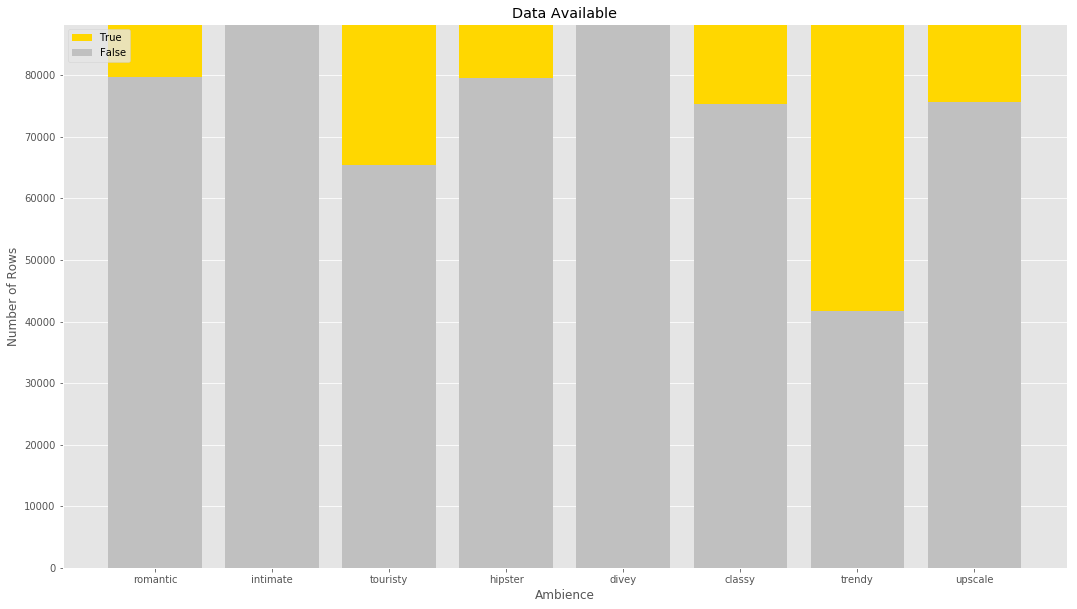

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
fig = plt.gcf()
fig.set_size_inches(18, 10)
col_lst_noRestuarant=['romantic','intimate','touristy','hipster','divey','classy','trendy','upscale']

df_col_list=df_col_list.drop(' Restaurants',axis=1)
Ambience_Category = list(col_lst_noRestuarant)
ind = [x for x, _ in enumerate(Ambience_Category)]

plt.bar(ind,df_col_list.loc[1] , width=0.8, label='True', color='gold', bottom=df_col_list.loc[0])
plt.bar(ind,df_col_list.loc[0], width=0.8, label='False', color='silver', )

plt.xticks(ind,Ambience_Category)
plt.ylabel("Number of Rows")
plt.xlabel("Ambience")
plt.legend(loc="upper left")
plt.title("Data Available")

plt.show()

In [19]:
#intimate and divey are all NaN. No useful information. Drop the two columns
#essentially, restaurants have features incompatible with 'intimate', 'divey' ambience.
df_restaurant_only=df_restaurant_only.drop(['intimate','divey'],axis=1)
df_restaurant_only.head()

,old_index,business_id,stars_x,stars_y,user_id,romantic,touristy,hipster,classy,trendy,upscale,Restaurants
7648,7648,yNPh5SO-7wr8HPpVCDPbXQ,4.0,5,6kEFHccntnYMF_7cdqCcKg,0,0,0,0,1,0,1
7649,7649,yNPh5SO-7wr8HPpVCDPbXQ,4.0,3,WJKocp9RE0KatUwh3_DkGg,0,0,0,0,1,0,1
7650,7650,yNPh5SO-7wr8HPpVCDPbXQ,4.0,4,9Jpq9Rtg6xx3nisN-FgGFg,0,0,0,0,1,0,1
7651,7651,yNPh5SO-7wr8HPpVCDPbXQ,4.0,1,8SNyzzb2nW730niBs4iZ3w,0,0,0,0,1,0,1
7652,7652,yNPh5SO-7wr8HPpVCDPbXQ,4.0,3,pCPTv0e8nfBM1lQF8ZrLZg,0,0,0,0,1,0,1


In [20]:
#star_x - refers to overall rating of each business_ide
#star_y - refers to individual user's ratings for each review.
print (df_restaurant_only['stars_x'].value_counts())
print (df_restaurant_only['stars_y'].value_counts())

4.0    42335
4.5    17174
3.5    15496
3.0    13308
Name: stars_x, dtype: int64
5    37750
4    23894
3    11588
2     7630
1     7451
Name: stars_y, dtype: int64


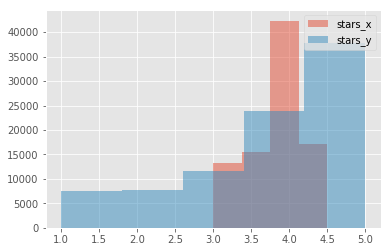

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
#overall rating for each business_id
plt.hist(df_restaurant_only['stars_x'],bins=4,alpha=0.5,label='stars_x')
plt.hist(df_restaurant_only['stars_y'],bins=5,alpha=0.5,label='stars_y')
plt.legend(loc='upper right')
plt.show()


In [22]:
#number of unique unique ratings given to each business_id.
df_countUser_perBusiness=df_restaurant_only.groupby('business_id')['user_id'].nunique().sort_values(ascending=False).to_frame()
df_countUser_perBusiness.head()

,user_id
business_id,
4JNXUYY8wbaaDmk3BPzlWw,8349
K7lWdNUhCbcnEvI0NhGewg,6710
5LNZ67Yw9RD6nf4_UhXOjw,4322
El4FC8jcawUVgw_0EIcbaQ,3945
eoHdUeQDNgQ6WYEnP2aiRw,3930


In [23]:
len(df_countUser_perBusiness)
#number of unique Restaurants 


28

In [24]:
df_countNumberBusinessReviewByUser=df_restaurant_only.groupby('user_id')['business_id'].nunique().sort_values(ascending=False).to_frame()
df_countNumberBusinessReviewByUser.head()

,business_id
user_id,
PKEzKWv_FktMm2mGPjwd0Q,19
C2C0GPKvzWWnP57Os9eQ0w,19
U4INQZOPSUaj8hMjLlZ3KA,19
bLbSNkLggFnqwNNzzq-Ijw,17
tH0uKD-vNwMoEc3Xk3Cbdg,15


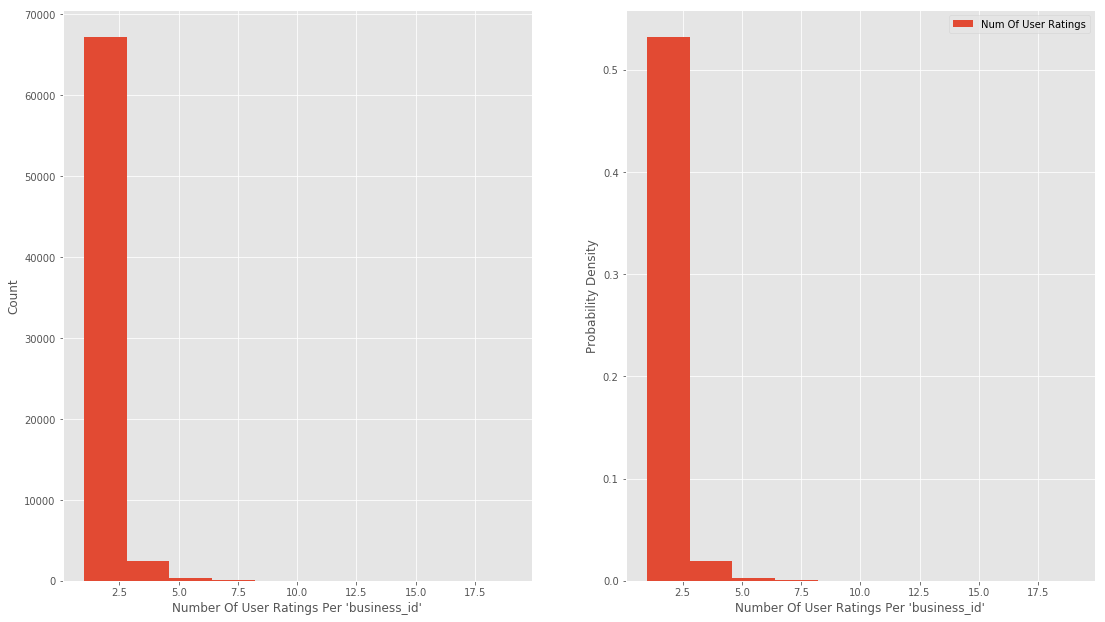

In [25]:
import matplotlib.pyplot as plt
#overall rating for each business_id
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18.5, 10.5)
ax[0].hist(df_countNumberBusinessReviewByUser['business_id'],label='Num Of User Ratings')

ax[1].hist(df_countNumberBusinessReviewByUser['business_id'],label='Num Of User Ratings',density=1)
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Number Of User Ratings Per \'business_id\'")
ax[1].set_ylabel("Probability Density")
ax[1].set_xlabel("Number Of User Ratings Per \'business_id\'")
plt.legend(loc='upper right')
plt.show()



In [26]:
df_count_Reviews=df_countNumberBusinessReviewByUser.business_id.value_counts()
df_count_Reviews

1     60101
2      7089
3      1801
4       641
5       246
6       129
7        65
8        45
9        20
10       14
11       12
12        3
15        3
19        3
13        2
14        2
17        1
Name: business_id, dtype: int64

In [27]:
df_count_Reviews.describe()

count       17.000000
mean      4128.058824
std      14526.759796
min          1.000000
25%          3.000000
50%         20.000000
75%        246.000000
max      60101.000000
Name: business_id, dtype: float64

In [28]:
df_count_Reviews.cumsum()

1     60101
2     67190
3     68991
4     69632
5     69878
6     70007
7     70072
8     70117
9     70137
10    70151
11    70163
12    70166
15    70169
19    70172
13    70174
14    70176
17    70177
Name: business_id, dtype: int64

Text(0, 0.5, "Number Of Ratings Per 'business_id'")

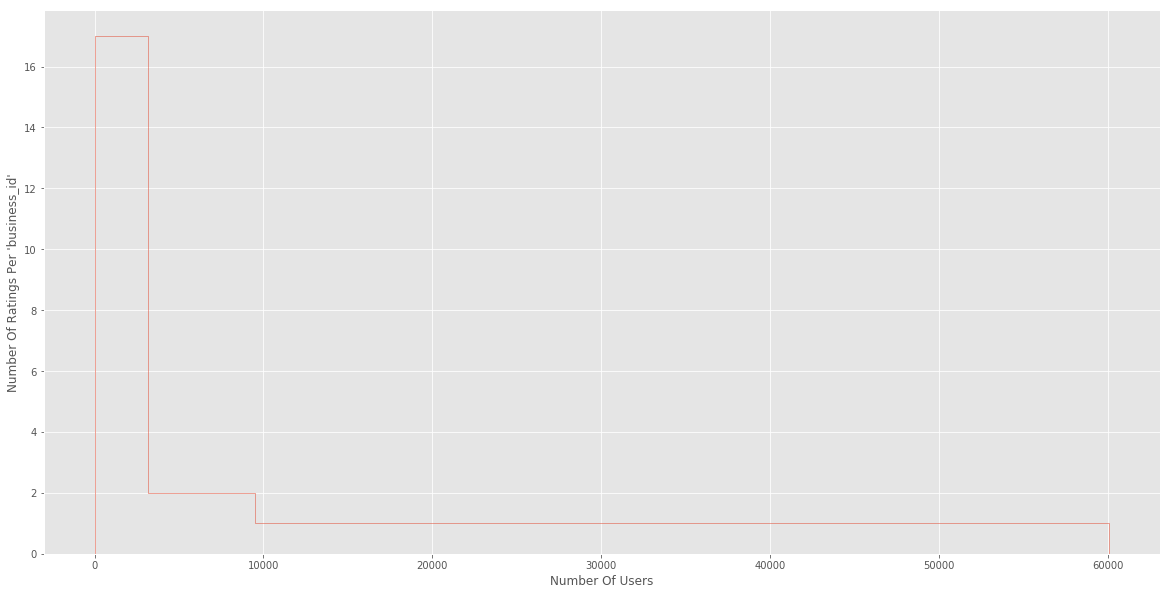

In [29]:
plt.figure(figsize=(20,10))
plt.hist(df_count_Reviews, bins=19, histtype='step', cumulative=-1,label='Cumulative Freq')
plt.xlabel('Number Of Users')
plt.ylabel('Number Of Ratings Per \'business_id\'')

In [30]:
df_countNumberBusinessReviewByUser[df_countNumberBusinessReviewByUser['business_id']>1].count()
#we will have reduce the dataset in order to perform pearson correlation later. 
#The large number of rows of data and user,after carefull consideration
#on using Peason Correlation,SVD,RBM, it is neccessary to reduce the data size or computation time becomes intractable.


business_id    10076
dtype: int64

In [31]:
len(df_countNumberBusinessReviewByUser)
#70177 unique users that provided reviews for Restaurants category.

70177

In [32]:
#create a K neaerest Neigbours Classifier model
df_restaurant_only.head()

,old_index,business_id,stars_x,stars_y,user_id,romantic,touristy,hipster,classy,trendy,upscale,Restaurants
7648,7648,yNPh5SO-7wr8HPpVCDPbXQ,4.0,5,6kEFHccntnYMF_7cdqCcKg,0,0,0,0,1,0,1
7649,7649,yNPh5SO-7wr8HPpVCDPbXQ,4.0,3,WJKocp9RE0KatUwh3_DkGg,0,0,0,0,1,0,1
7650,7650,yNPh5SO-7wr8HPpVCDPbXQ,4.0,4,9Jpq9Rtg6xx3nisN-FgGFg,0,0,0,0,1,0,1
7651,7651,yNPh5SO-7wr8HPpVCDPbXQ,4.0,1,8SNyzzb2nW730niBs4iZ3w,0,0,0,0,1,0,1
7652,7652,yNPh5SO-7wr8HPpVCDPbXQ,4.0,3,pCPTv0e8nfBM1lQF8ZrLZg,0,0,0,0,1,0,1


In [33]:
df_restaurant_only.shape

(88313, 12)

In [34]:
df_test_x=df_restaurant_only[['business_id','stars_x','romantic','touristy','hipster','classy','trendy','upscale']]
df_test_x.head()

,business_id,stars_x,romantic,touristy,hipster,classy,trendy,upscale
7648,yNPh5SO-7wr8HPpVCDPbXQ,4.0,0,0,0,0,1,0
7649,yNPh5SO-7wr8HPpVCDPbXQ,4.0,0,0,0,0,1,0
7650,yNPh5SO-7wr8HPpVCDPbXQ,4.0,0,0,0,0,1,0
7651,yNPh5SO-7wr8HPpVCDPbXQ,4.0,0,0,0,0,1,0
7652,yNPh5SO-7wr8HPpVCDPbXQ,4.0,0,0,0,0,1,0


In [35]:
df_test_x[['romantic','touristy','hipster','classy','trendy','upscale','stars_x']].corr().round(3)
#some negative correlations intuitively seem correct. Such as classy ambience negatively correlates with trendy ambience.
#the touristy ambience is negatively correlated with positive ratings.

,romantic,touristy,hipster,classy,trendy,upscale,stars_x
romantic,1.000,-0.194,-0.109,-0.136,-0.347,-0.133,0.098
touristy,-0.194,1.000,-0.196,0.054,-0.397,-0.088,-0.557
hipster,-0.109,-0.196,1.000,-0.137,0.153,-0.135,0.359
classy,-0.136,0.054,-0.137,1.000,-0.305,0.234,0.142
trendy,-0.347,-0.397,0.153,-0.305,1.000,-0.002,0.301
upscale,-0.133,-0.088,-0.135,0.234,-0.002,1.000,0.193
stars_x,0.098,-0.557,0.359,0.142,0.301,0.193,1.000


In [36]:
df_test_x['business_id'].nunique()
#there are total of 28 restaurants in this dataset

28

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df_test_x['business_id'])
y=le.transform(df_test_x['business_id'])
y

array([27, 27, 27, ...,  6,  6,  6])

In [50]:
y.shape

(88313,)

X_train.shape: (70650, 6)
X_test.shape: (17663, 6)
0.4987827662345015
[(1, 0.48542150257600636), (2, 0.48542150257600636), (3, 0.48542150257600636), (4, 0.48542150257600636), (5, 0.4987827662345015), (6, 0.47387193568476477), (7, 0.47387193568476477), (8, 0.47681594293155183), (9, 0.47681594293155183), (10, 0.47681594293155183), (11, 0.47681594293155183), (12, 0.48830889429881674), (13, 0.5064824774953293), (14, 0.48830889429881674), (15, 0.5064824774953293), (16, 0.5035384702485421), (17, 0.4949895261280643), (18, 0.4949895261280643), (19, 0.4949895261280643), (20, 0.4949895261280643), (21, 0.4949895261280643), (22, 0.4949895261280643), (23, 0.4949895261280643), (24, 0.4949895261280643), (25, 0.4949895261280643), (26, 0.4949895261280643), (27, 0.4949895261280643)]
0.5064824774953293


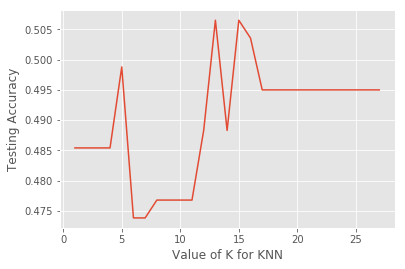

In [134]:
#first run of KNN. train_test_split by random. No cross validation, data is not stratified spilt.
#test_size=0.2, a typical setting. 
from sklearn import neighbors,metrics
from sklearn.model_selection import train_test_split
X=df_test_x[['romantic','touristy','hipster','classy','trendy','upscale']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4,)
print ('X_train.shape:',X_train.shape)
print ('X_test.shape:',X_test.shape)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

k_range = range(1, 28)

scores = []

# We use a loop through the range 1 to 27
# We append the scores in the dictionary
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append((k,metrics.accuracy_score(y_test, y_pred)))

print(scores)

# locate the best vakue for K
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot([i[0] for i in scores],[i[1] for i in scores])
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#from graph, the best accuracy value is when K=13
knn = neighbors.KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

In [135]:
print (y_test, y_test.shape)
print (y_pred, y_pred.shape)
confusion_matrix(y_test,y_pred)

[13 18  3 ...  5  5 10] (17663,)
[13 11  3 ...  6  6 11] (17663,)


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         394,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         464,    0,    0,    0,    0,    0],
       [   0,    0, 1699,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  921,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  402,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    

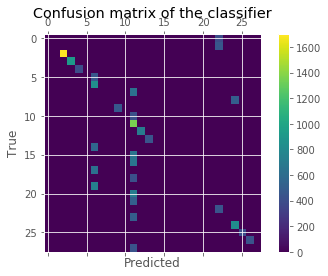

In [136]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix(y_test,y_pred))
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [125]:
from sklearn.metrics import classification_report

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=knn.predict(X_test))
print(sk_report)

              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000       419
           1   0.000000  0.000000  0.000000       453
           2   1.000000  1.000000  1.000000      1714
           3   1.000000  1.000000  1.000000       904
           4   1.000000  1.000000  1.000000       405
           5   0.000000  0.000000  0.000000       464
           6   0.248408  1.000000  0.397959       819
           7   0.000000  0.000000  0.000000       597
           8   0.383730  1.000000  0.554631       500
           9   1.000000  1.000000  1.000000       473
          10   0.000000  0.000000  0.000000       390
          11   0.221739  1.000000  0.362989      1377
          12   1.000000  1.000000  1.000000       728
          13   1.000000  1.000000  1.000000       423
          14   0.000000  0.000000  0.000000       576
          15   0.000000  0.000000  0.000000       668
          16   0.000000  0.000000  0.000000       661
          17   0.000000  0.

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [138]:
#to improve the acccuracy, try splitting data in stratify fashion
#using metric =cosine
from sklearn import neighbors,metrics
from sklearn.model_selection import train_test_split
X=df_test_x[['romantic','touristy','hipster','classy','trendy','upscale']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4,stratify=y)
print ('X_train.shape:',X_train.shape)
print ('X_test.shape:',X_test.shape)

k_range = range(1, 28)

scores = []

# We use a loop through the range 1 to 27
# We append the scores in the dictionary
for k in k_range:
    knn = neighbors.KNeighborsClassifier(metric='cosine',n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append((k,metrics.accuracy_score(y_test, y_pred)))

print(scores)

X_train.shape: (70650, 6)
X_test.shape: (17663, 6)
[(1, 0.4515088037139784), (2, 0.43333522051746587), (3, 0.43333522051746587), (4, 0.46911623167072414), (5, 0.48627073543565646), (6, 0.48627073543565646), (7, 0.48627073543565646), (8, 0.4881956632508634), (9, 0.4881956632508634), (10, 0.4881956632508634), (11, 0.4881956632508634), (12, 0.4881956632508634), (13, 0.4476589480835645), (14, 0.43050444431863216), (15, 0.4476589480835645), (16, 0.4476589480835645), (17, 0.4881956632508634), (18, 0.4476589480835645), (19, 0.44573402026835757), (20, 0.44573402026835757), (21, 0.44573402026835757), (22, 0.44573402026835757), (23, 0.44573402026835757), (24, 0.44573402026835757), (25, 0.44573402026835757), (26, 0.44573402026835757), (27, 0.44573402026835757)]


Text(0, 0.5, 'Testing Accuracy')

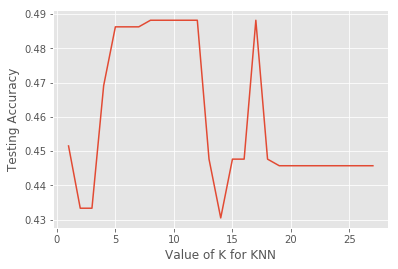

In [139]:
# locate the best vakue for K
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot([i[0] for i in scores],[i[1] for i in scores])
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [129]:
#to improve the acccuracy, try splitting data in stratify fashion
from sklearn import neighbors,metrics
from sklearn.model_selection import train_test_split
X=df_test_x[['romantic','touristy','hipster','classy','trendy','upscale']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4,stratify=y)
print ('X_test.shape:',X_test.shape)

X_train.shape: (70650, 6)
X_test.shape: (17663, 6)


In [130]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.44035554549057354


In [131]:
k_range = range(1, 28)

scores = []

# We use a loop through the range 1 to 27
# We append the scores in the dictionary
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append((k,metrics.accuracy_score(y_test, y_pred)))

print(scores)

[(1, 0.4408650852063636), (2, 0.43616599671629963), (3, 0.43616599671629963), (4, 0.4912529015456038), (5, 0.44035554549057354), (6, 0.44035554549057354), (7, 0.4892147426824435), (8, 0.4892147426824435), (9, 0.4912529015456038), (10, 0.4912529015456038), (11, 0.5082941742625828), (12, 0.4892147426824435), (13, 0.4912529015456038), (14, 0.49113967049765045), (15, 0.5084074053105362), (16, 0.4912529015456038), (17, 0.4901205910660703), (18, 0.4881956632508634), (19, 0.4881956632508634), (20, 0.4881956632508634), (21, 0.4892147426824435), (22, 0.4881956632508634), (23, 0.4892147426824435), (24, 0.4892147426824435), (25, 0.4892147426824435), (26, 0.4892147426824435), (27, 0.4892147426824435)]


Text(0, 0.5, 'Testing Accuracy')

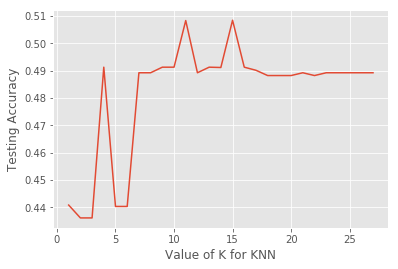

In [132]:
# locate the best vakue for K
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot([i[0] for i in scores],[i[1] for i in scores])
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [133]:
sk_report2 = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=knn.predict(X_test))
print(sk_report2)

              precision    recall  f1-score   support

           0   0.315750  1.000000  0.479954       419
           1   0.000000  0.000000  0.000000       453
           2   1.000000  1.000000  1.000000      1714
           3   1.000000  1.000000  1.000000       904
           4   1.000000  1.000000  1.000000       405
           5   0.000000  0.000000  0.000000       464
           6   0.248408  1.000000  0.397959       819
           7   0.000000  0.000000  0.000000       597
           8   0.383730  1.000000  0.554631       500
           9   1.000000  1.000000  1.000000       473
          10   0.000000  0.000000  0.000000       390
          11   0.221739  1.000000  0.362989      1377
          12   1.000000  1.000000  1.000000       728
          13   1.000000  1.000000  1.000000       423
          14   0.000000  0.000000  0.000000       576
          15   0.000000  0.000000  0.000000       668
          16   0.000000  0.000000  0.000000       661
          17   0.000000  0.

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
#from graph, the best accuracy value is when K=15
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5084074053105362


In [89]:
print (y_test, y_test.shape)
print (y_pred, y_pred.shape)
confusion_matrix(y_test,y_pred)

[ 2 19  8 ... 11 13  3] (17663,)
[ 2  6  8 ... 11 13  3] (17663,)


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         419,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         453,    0,    0,    0,    0,    0],
       [   0,    0, 1714,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  904,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  405,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    

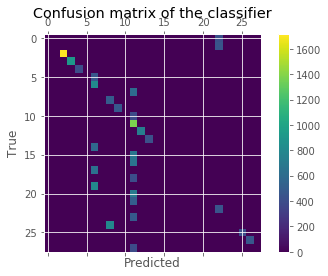

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix(y_test,y_pred))
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [91]:
# To further improve accuracy, use k-fold cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model with n_neighbors =15 based from previous result.
knn_cv = neighbors.KNeighborsClassifier(n_neighbors=15)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=3,n_jobs=-1)
print(cv_scores)

[0.43104561 0.43109481 0.43106671]


In [92]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = neighbors.KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 28)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=3, n_jobs=-1)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
#check top performing n_neighbors value
print (knn_gscv.best_params_)
print(knn_gscv.best_estimator_)

{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


In [94]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.43106903853339823

In [ ]:
X_train.head()

In [ ]:
df_test=df_restaurant_only[['business_id','user_id','stars_y']]
df_test.head()

In [ ]:
df_test_reshaped = df_test.pivot_table(index='business_id', columns='user_id',values='stars_y',aggfunc=np.mean)
df_test_reshaped.head()

In [ ]:
df_test_reshaped.index.str.match('4JNXUYY8wbaaDmk3BPzlWw')

In [ ]:
#Two highest reviewed business id: 4JNXUYY8wbaaDmk3BPzlWw, K7lWdNUhCbcnEvI0NhGewg
#Just get a visualization of two business_id in scatter plot
top=df_test_reshaped[df_test_reshaped.index.str.match('4JNXUYY8wbaaDmk3BPzlWw')]
top_2nd=df_test_reshaped[df_test_reshaped.index.str.match('K7lWdNUhCbcnEvI0NhGewg')]
#c=
plt.scatter(top,top_2nd)
plt.xlabel("Business_id:4JNXUYY8wbaaDmk3BPzlWw")
plt.ylabel("Business_id:K7lWdNUhCbcnEvI0NhGewg")
plt.title('Comparison Of Top Two Business_ids\' Users\' Ratings')


#test Pearson Correlation Between Two Users With Most Reviews
df_test_reshaped.PKEzKWv_FktMm2mGPjwd0Q.corr(df_test_reshaped.C2C0GPKvzWWnP57Os9eQ0w)

dfPearson=df_test_reshaped.corr().round(4)

import time
import multiprocessing as mp

pool = mp.Pool(mp.cpu_count())

def multiprocess_pearson(df):
    if __name__ == '__main__':
        start=time.time()
        result=pool.map(calculate_correlation, args=(df,todos))       
        pool.close()
        pool.join()
        end = time.time()
        print ('Total Time Taken:', end-start)

#use dataframe's corr() function to derive the scores between every pair of users
#from scipy.stats import pearsonr
def calculate_correlation(df,todos):
    # pseudo code here
    #return pearsonr(df_test_reshaped[t1], df_test_reshaped[t2])
    return df[t1].corr(df[t2])

pool = mp.Pool(mp.cpu_count())
def multiprocess_todo(df):
    if __name__ == '__main__':
        start=time.time()
        keylist=list(df_test_reshaped.keys())
        result=pool.apply_async(todo_list,args=(keylist,))       
        pool.close()
        pool.join()
        end = time.time()
        print ('Total Time Taken:', end-start)

todos = []
def todo_list(keylist):
    for t1 in keylist:
        for t2 in keylist:  # only the matrix top triangle
            todos.append((t1, t2))
    return todos